## End to End project with deployment 

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df = pd.read_csv('height-weight.csv')

In [17]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [18]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

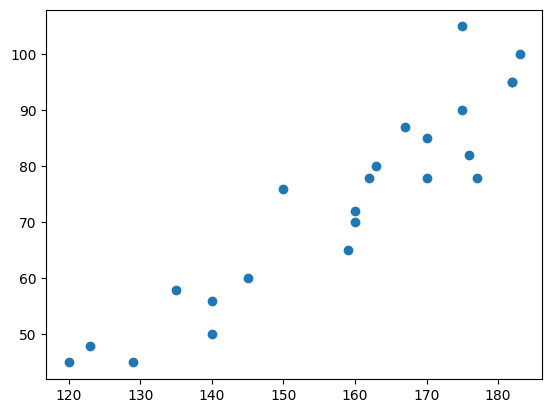

In [19]:
plt.scatter(df['Height'], df['Weight'])

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X=df[['Weight']]
y=df['Height']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [23]:
#next step will be to standarize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [24]:
X_train = scalar.fit_transform(X_train) #I need to give 2d for fit_transform
X_test = scalar.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()

In [26]:
Linear.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = Linear.predict(X_test)

In [28]:
#my slope/coeffient is 
Linear.coef_

array([17.03440872])

In [30]:
#regressor is
print(Linear.intercept_)

157.5


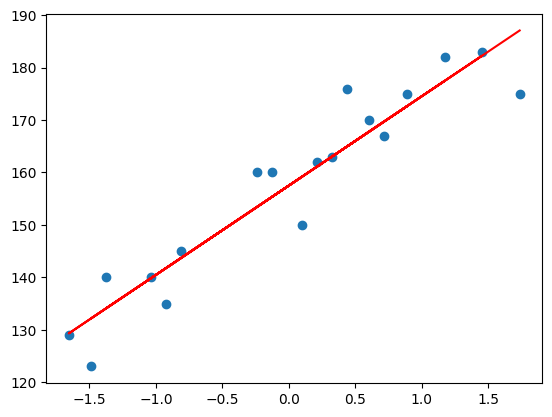

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train,Linear.predict(X_train), 'r')


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [36]:
y_pred,y_test


(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

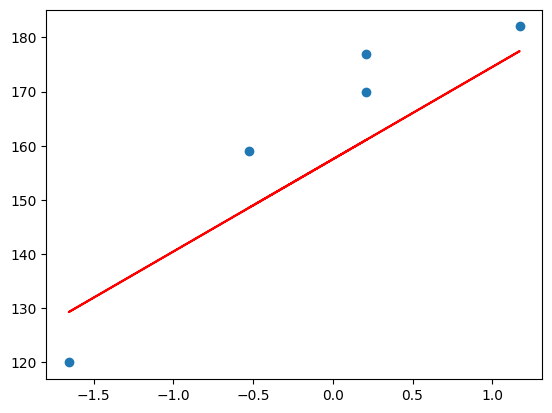

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Linear.predict(X_test),'r')


## Performance Metrics
## MSE,MAE,RMSE
## R square and adjusted R square

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [45]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.776986986042344

In [46]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [47]:
## new data point weight is 80

scaled_weight=scalar.transform([[80]]) ##needs to be 2d
scaled_weight

/opt/anaconda3/envs/dsml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [48]:

scaled_weight[0]


array([0.32350772])

In [50]:
print("The height prediction for weight 80 kg is :",Linear.predict([scaled_weight[0]]))


The height prediction for weight 80 kg is : [163.01076266]


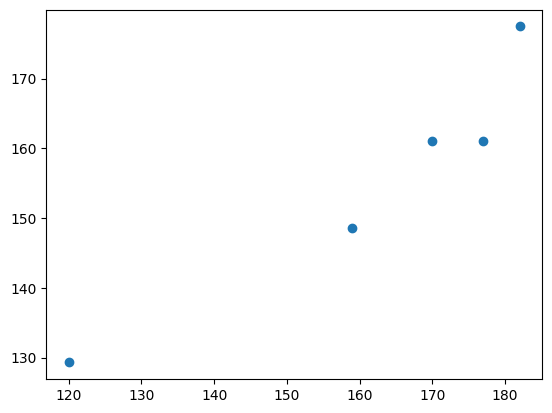

In [52]:

## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

In [53]:

## Residuals
residuals=y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/var/folders/q7/qxk8vry10nq7nhvkz9c8t2680000gn/T/ipykernel_85610/37894111.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

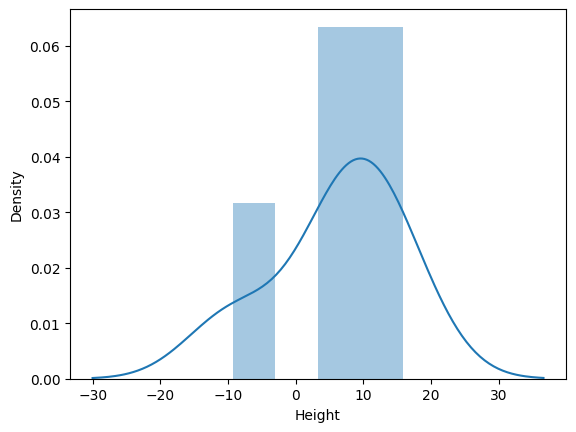

In [54]:

## plot this residuals = should be normal-ish distribution
import seaborn as sns
sns.distplot(residuals,kde=True)

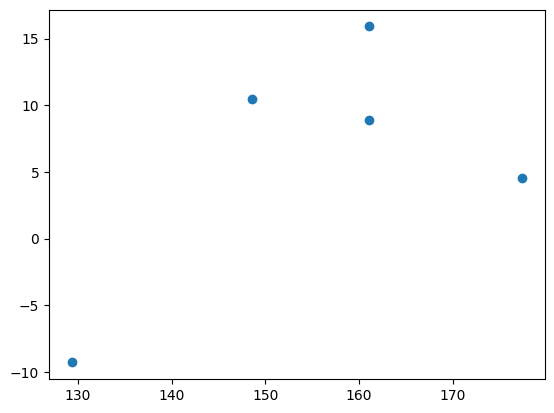

In [56]:

## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)